# Модель жизненных сценариев

Срок жизни животного 1000 шагов (что соответствует 70 лет человека)

Создадим животное с возрастом, соответсвующим человеческим 30 годам

In [163]:
import math

age = 30

age_coef_const = 70 / 1000
print("Один шаг модели равняется ", age_coef_const, " годам")

current_step = math.trunc(age / age_coef_const)

def getAge(step):
    return 70 / 1000 * step
    
print(round(getAge(current_step)))

Один шаг модели равняется  0.07  годам
30


Определим максимальную возможную энергию животного для текущего шага жизни животного

Зададим константу $E_0$ равной 100

In [164]:
import numpy as np

E_max = np.zeros(1000)

def lambda_f(x):
    x= x/7
    return ((x**2) + (2*x))/((x**2) + 3)

E_0 = 100

E_max[:] = lambda_f(getAge(np.arange(1000))) * E_0
E_max[current_step]

126.08075652957069

Просто выведем график максимальной энергии по шагам жизни агента

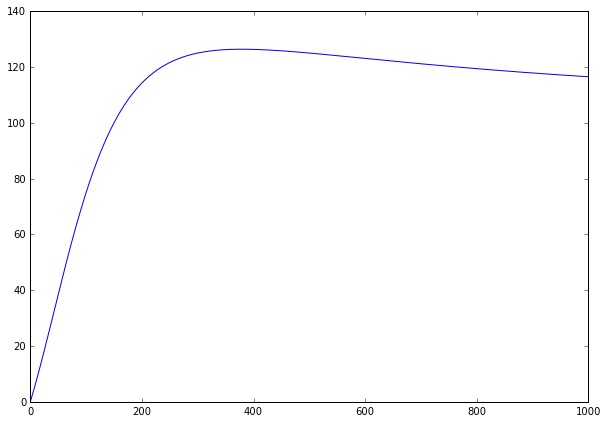

In [165]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

t = np.arange(0, 1000)
plt.figure(figsize=(10, 7))
plt.plot(t, E_max, 'b')
plt.show()

Наделим животное максимальной энергией для текущего шага жизни

In [166]:
import numpy as np

E = np.zeros(1000)
E[current_step -1] = E_max[current_step - 1]

Запускаем случай голодания, когда животное не тратит время на передвижение, и не получает пищи

In [167]:
def epsilon_f(x):
    x = x/ 6
    return (x**3)/((4.5*x**3) - (14*x**2) + 18*x - 0.1) + 2

for i in range(current_step, current_step + 60):
    E[i] = E[i-1] - epsilon_f(getAge(i))
    if E[i] <= 0:
        print(i - current_step)
        break

print(E[current_step + 50], E[current_step + 51], E[current_step + 52])

52
3.63603157181 1.24701528534 -1.14157414846


На шаге 52 голодания енергия животного переходит через ноль

# График убывания энергии при голодании по шагам жизни агента

Животное не двигается, не ест, теряет энергию каждый шаг модели

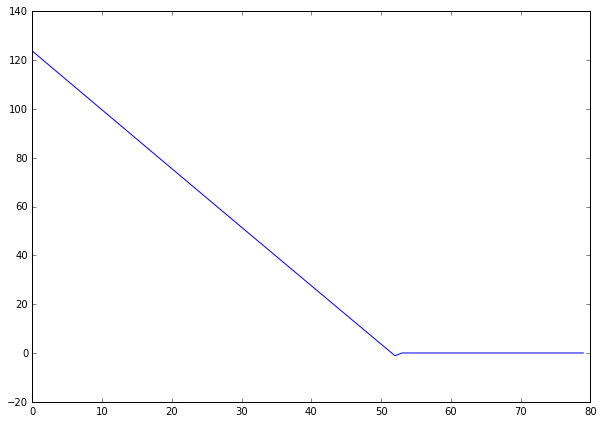

In [168]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

t = np.arange(0, 80)
plt.figure(figsize=(10, 7))
plt.plot(t, E[428:508], 'b')
plt.show()

Количество шагов голодания для каждого из возрастов агентов в шагах модели

In [169]:
x = np.zeros(1000)
Ene = []
for step in range(1, 1000):
    Energy = np.zeros(1000)
    Energy[step - 1] = E_max[step - 1]
    for i in range(step, 1000):
        Energy[i] = Energy[i-1] - epsilon_f(getAge(i))
        if Energy[i] <= 0:
            x[step] = i - step
            break
    Ene.append(Energy)

# График длительности возможного голодания по шагам жизни агента

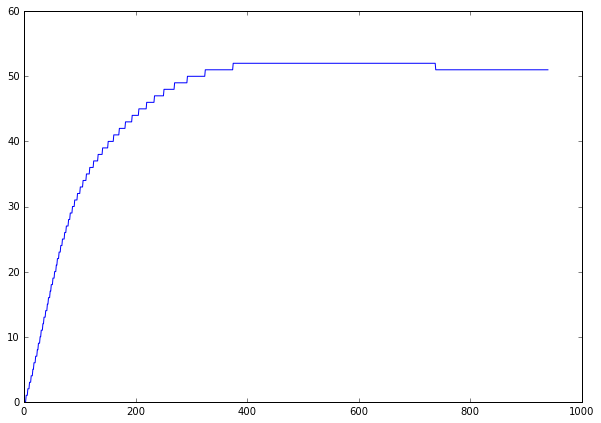

In [170]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

t = np.arange(0, 940)
plt.figure(figsize=(10, 7))
plt.plot(t, x[:940], 'b')
plt.show()

<h1>Определение запаса сил</h1>

In [171]:
print(E[420:490], current_step)

[   0.            0.            0.            0.            0.            0.
    0.          126.09158429  123.67791368  121.26478644  118.85219994
  116.44015157  114.02863874  111.61765888  109.20720941  106.79728778
  104.38789146  101.97901793   99.57066468   97.16282921   94.75550904
   92.3487017    89.94240475   87.53661573   85.13133223   82.72655184
   80.32227214   77.91849077   75.51520534   73.11241349   70.7101129
   68.30830121   65.90697612   63.50613531   61.1057765    58.70589742
   56.30649578   53.90756934   51.50911586   49.11113312   46.7136189
   44.316571     41.91998723   39.52386541   37.12820338   34.732999
   32.33825013   29.94395463   27.5501104    25.15671533   22.76376734
   20.37126435   17.9792043    15.58758513   13.19640481   10.8056613
    8.41535259    6.02547668    3.63603157    1.24701529   -1.14157415
    0.            0.            0.            0.            0.            0.
    0.            0.            0.        ] 428


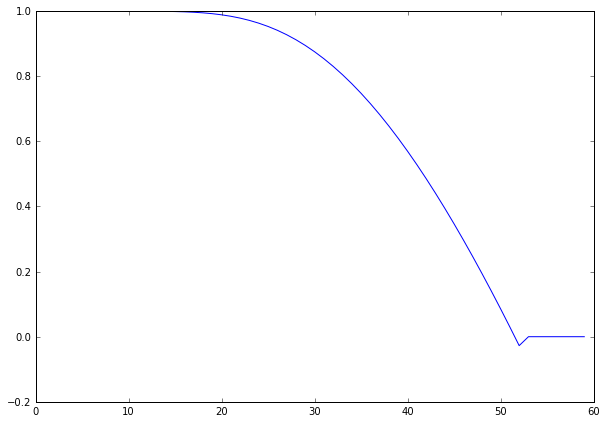

In [172]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def theta_f(e, e_m):
    return 1 - np.exp((-3*e)/(e_m - e))

T = np.zeros(1000)
for i in range(current_step, current_step + 60):
    T[i] = theta_f(E[i], E_max[i])


t = np.arange(0, 60)
plt.figure(figsize=(10, 7))
plt.plot(t, T[428:488], 'b')
plt.show()

Пусть значение до 30 шагов - приемлимое время, при котором выносливость не сильно уменьшается
Запас сил до 0.8 не очень плохо

In [173]:
x = np.zeros(1000)

for step in range(1, 1000):
    Energy = np.zeros(1000)
    Energy[step - 1] = E_max[step - 1]
    for i in range(step, 1000):
        Energy[i] = Energy[i-1] - epsilon_f(getAge(i))
        T[i] = theta_f(Energy[i], E_max[i])
        if T[i] <= 0.8:
            x[step] = i - step
            break

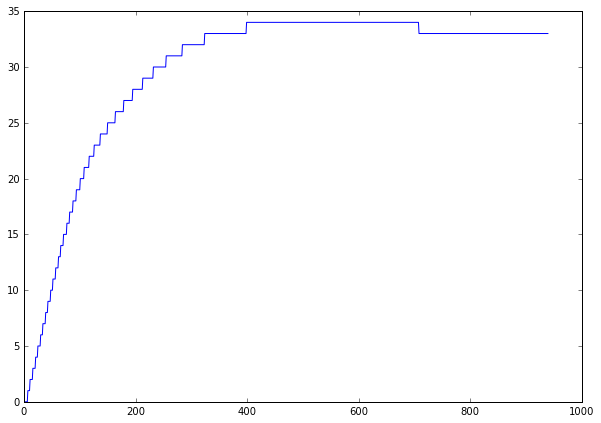

In [174]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

t = np.arange(0, 940)
plt.figure(figsize=(10, 7))
plt.plot(t, x[:940], 'b')
plt.show()

На данном графике мы определили, через какое количество шагов агент начинает чувствовать снижение выносливости

TODO: изучить кормление, питательность пищи

<h1> Определение питательности пищи </h1> 

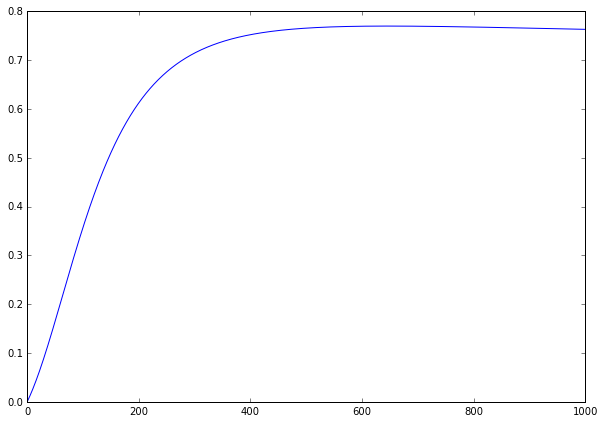

In [175]:
def gamma_f(x):
    x /= 7
    return ((5*x**2) + (5*x))/(7*((x**2)+3))

G = np.zeros(1000)
for i in range(1000):
    G[i] = gamma_f(getAge(i))


t = np.arange(0, 1000)
plt.figure(figsize=(10, 7))
plt.plot(t, G, 'b')
plt.show()

In [176]:
print(x[428])

34.0


In [177]:
step_chernyaya_polosa = current_step + int(x[current_step])
E_nepoevshi = E[step_chernyaya_polosa]
print(E_nepoevshi)

41.9199872252


Кормим взрослого агента одной большой жертвой

In [178]:
print(E_nepoevshi - epsilon_f(getAge(step_chernyaya_polosa)) + \
115*gamma_f(getAge(428)))

126.598284441


Постулируем const $E_f$ = 115

In [179]:
print(E_nepoevshi - epsilon_f(getAge(step_chernyaya_polosa))*5 + \
115*gamma_f(getAge(50))*5)

124.717288146


Откуда вместо большой жертвы надо съесть 5 младенцев-жертв

In [180]:
print(x[100]);

19.0


In [181]:
print(E_max[100]);

75.0


In [205]:
step_chernyaya_polosa = 100 + int(x[100])
E_nepoevshi = Ene[100]
print(E_nepoevshi[100 + 19])

32.7416681971


In [201]:
print(E_nepoevshi[step_chernyaya_polosa] - epsilon_f(getAge(step_chernyaya_polosa)) + \
115*gamma_f(getAge(428)))

117.547534284


In [204]:
print(E_nepoevshi[step_chernyaya_polosa] - epsilon_f(getAge(step_chernyaya_polosa)) * 1 + \
115*gamma_f(getAge(119)) * 1)

78.9481180726


100-шаговый животное-ребенок наедается стошаговым ребенком